<a href="https://colab.research.google.com/github/SriIndhuja17/infosys-internship/blob/main/Gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.LOAD THE DATASET**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
data_path = '/content/credit_underwriting_sample_dataset (1).csv' # Update with your file path
df = pd.read_csv(data_path)

**2.BASIC EXPLORATION**

In [ ]:
# Step 2: Basic exploration
print("Dataset Head:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

Dataset Head:
   Age  Gender Education Marital_Status  Income  Debt_to_Income_Ratio  \
0   56    Male    Master         Single   63037                  0.58   
1   69    Male  Bachelor        Married   63309                  0.12   
2   46    Male  Bachelor         Single   38550                  0.15   
3   32  Female  Bachelor        Married   50569                  0.12   
4   60    Male    Master        Married   60249                  0.19   

   Credit_Score  Loan_Amount  Loan_Term  Interest_Rate  Default_Status  
0           445        14331         36           6.95               0  
1           326        11163         24          10.91               0  
2           829        24609         24           6.53               0  
3           381        11714         36           5.59               1  
4           727        20693         24           4.90               0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1

**3.CHECK FOR MISSING VALUES**

In [ ]:
# Step 3: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Optional: Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True) # Replace numeric NaN with column means


Missing Values:
Age                     0
Gender                  0
Education               0
Marital_Status          0
Income                  0
Debt_to_Income_Ratio    0
Credit_Score            0
Loan_Amount             0
Loan_Term               0
Interest_Rate           0
Default_Status          0
dtype: int64


**4.DATA VISUALIZATION**

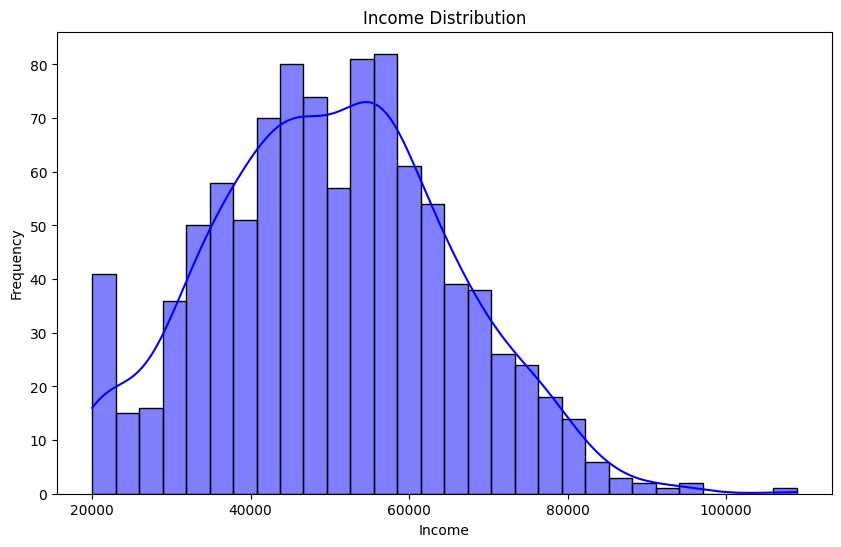

In [ ]:
# Step 4: Visualize data
# Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

**5.CORRELATION ANALYSIS**

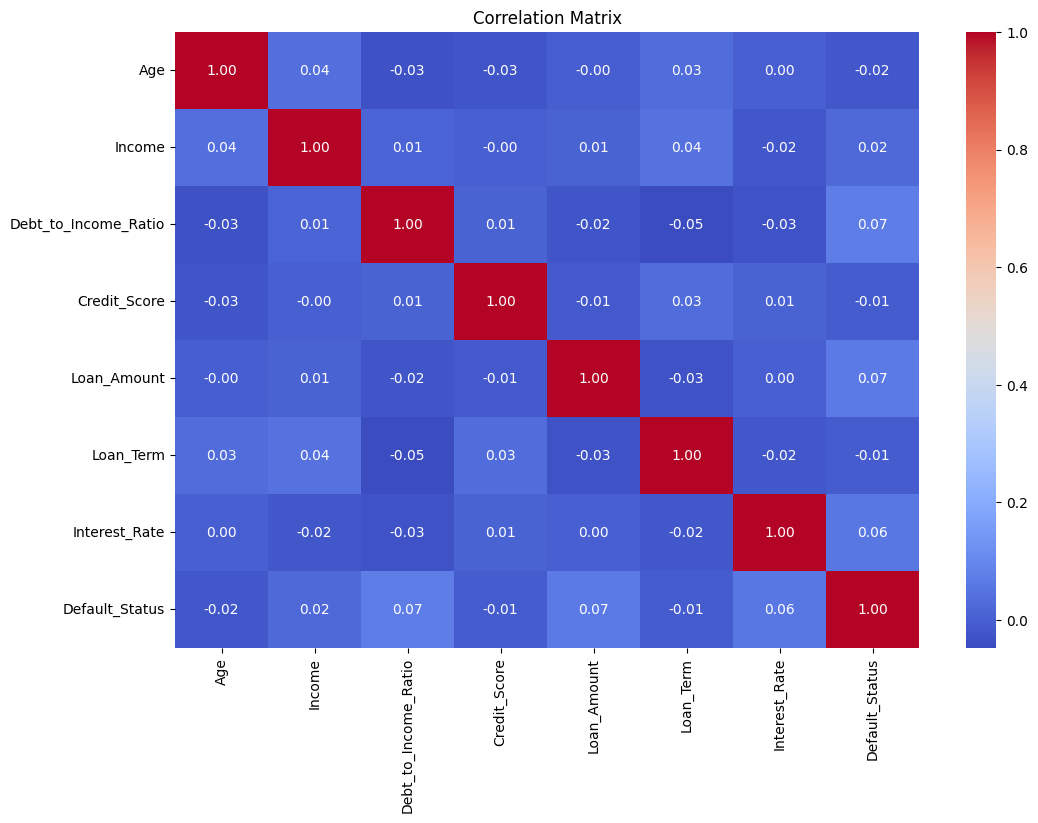

In [ ]:
# Step 5: Correlation Analysis
plt.figure(figsize=(12, 8))
# Include only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()  # Calculate correlation on numerical data
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

**6.ANALYZING DEFAULT STATUS USING AGE GROUP**



<ipython-input-7-43a6cddb81af>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  defaults_by_age_group = df.groupby('Age_Group')['Default_Status'].mean()


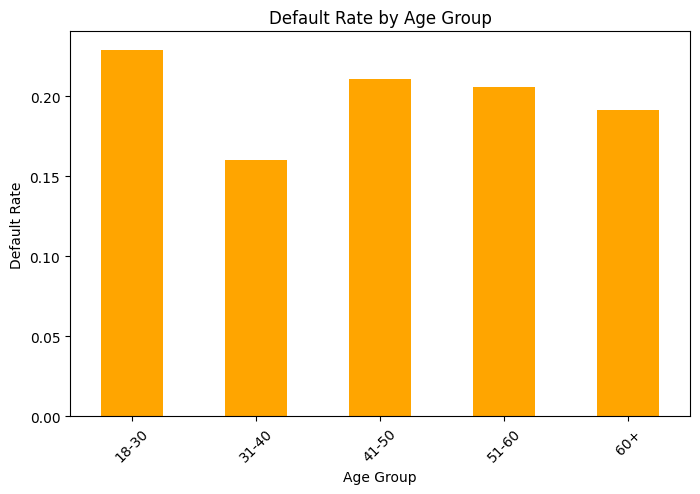

In [ ]:
# Step 6: Analyze default status by age group
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
defaults_by_age_group = df.groupby('Age_Group')['Default_Status'].mean()

plt.figure(figsize=(8, 5))
defaults_by_age_group.plot(kind='bar', color='orange')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()


**7.PREDICTIVE MODELLING AND HYPERPARAMETER TUNING**

In [ ]:
# Step 7: Predictive Modeling with Gradient Boosting and Hyperparameter Tuning
# Select features and target
features = ['Age', 'Income', 'Debt_to_Income_Ratio', 'Credit_Score'] # Update with relevant columns
target = 'Default_Status'

X = df[features]
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300], # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.2], # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5], # Maximum depth of each tree
    'subsample': [0.8, 1.0], # Fraction of samples used for fitting individual trees
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

if accuracy >= 0.9:
    print("Achieved at least 90% accuracy!")
else:
    print("Model accuracy is below 90%. Consider further tuning or feature engineering.")


Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       168
           1       0.00      0.00      0.00        32

    accuracy                           0.83       200
   macro avg       0.42      0.49      0.45       200
weighted avg       0.70      0.83      0.76       200

Model accuracy is below 90%. Consider further tuning or feature engineering.
